
        # Twitter Sentiment Analysis using NLP

In [79]:
import tweepy
import re
import pickle

In [80]:
from tweepy import OAuthHandler

In [81]:
consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO' 
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_secret ='ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'

In [71]:
# Initializing the tokens
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['samsung'];
api = tweepy.API(auth,timeout=10)

In [72]:
# Fetching the tweets
list_tweets = []

query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)

In [73]:
list_tweets

['Samsung EVO Plus Grade 1, Class 10 32GB MicroSDHC 95 MB/S Memory Card with SD Adapter (MB-MC32GA/IN) https://t.co/8v0nHFVj6a',
 '@chronopiox @MKBHD u r over dramatic,,, Samsung used delay software updates as well, LG does provide but delayed, M… https://t.co/uc5kzzGbbO',
 "@myvoltas I never got a call back from your team with repair estimate now it's the 3rd Hottest Day of summer in Kol… https://t.co/Ro7O9mkMfj",
 "Wow !!😊\nI'm Again..\nThank you amazon to give me the opportunity to win a Samsung m40.#GuessAndWin #OMG https://t.co/LST2bbioHy",
 'Our Samsung Galaxy A80 video review is up https://t.co/ajKZfyk6nJ',
 'Samsung Confirms 📶\nhttps://t.co/W9zapvuyeC https://t.co/BijAJdTwti',
 "I'm considering Samsung Galaxy M30 to buy. Then What version of Android would I get with this phone ? Could you ple… https://t.co/CrWkTzJbA2",
 'Samsung Galaxy Note10 Pro renders show off punch hole display and quad camera https://t.co/bjkjISQhQe',
 '@ItsKhakame global - Samsung but particular in India 

In [74]:
       
# Loading the vectorizer and classfier
with open('classifier.pickle','rb') as f:
    classifier = pickle.load(f)
    
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)    

In [75]:
# Preprocessing the tweets
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    print(tweet)

samsung evo plus grade class gb microsdhc mb memory card with sd adapter mb mc ga in 
 chronopiox mkbhd r over dramatic samsung used delay software updates as well lg does provide but delayed 
 myvoltas never got call back from your team with repair estimate now it is the rd hottest day of summer in kol 
wow am again thank you amazon to give me the opportunity to win samsung guessandwin omg 
our samsung galaxy video review is up 
samsung confirms 
 am considering samsung galaxy to buy then what version of android would get with this phone could you ple 
samsung galaxy note pro renders show off punch hole display and quad camera 
 itskhakame global samsung but particular in india xiaomi oneplus samsung oppo apple etc more 
 samsung customer services are highly important and is the basis for any company but services laid out by samsung 
graphics design and photoshop editing samsung galaxy unboxing like my page
 geekyranjit sir can you please review the samsung galaxy e am little confused

In [76]:
#sent = classifier.predict(tfidf.transform([tweet]).toarray())
#print(tweet,":",sent)

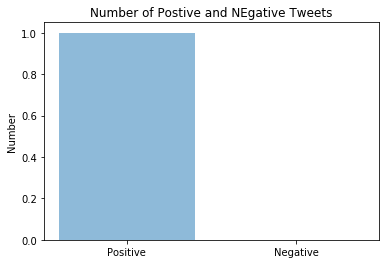

In [77]:
total_pos=0
total_neg=0
sent = classifier.predict(tfidf.transform([tweet]).toarray())
if sent[0] == 1:
    total_pos += 1
else:
    total_neg += 1
    
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')
plt.show()